<a href="https://colab.research.google.com/github/FrZeller/hydra/blob/main/JSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import json
import numpy as np
import requests
import matplotlib.pyplot as plt
import datetime

In [23]:
url_vendas = 'https://cdn3.gnarususercontent.com.br/2928-transformacao-manipulacao-dados/dados_vendas_clientes.json'

response = requests.get(url_vendas)

df_vendas = pd.DataFrame(response.json())
df_vendas = pd.json_normalize(df_vendas['dados_vendas'])
df_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,"[@ANA _LUCIA 321, DieGO ARMANDIU 210, DieGO AR...","[R$ 836,5, R$ 573,33, R$ 392,8, R$ 512,34]"
1,07/06/2022,"[Isabely JOanes 738, Isabely JOanes 738, Isabe...","[R$ 825,31, R$ 168,07, R$ 339,18, R$ 314,69]"
2,08/06/2022,"[Isabely JOanes 738, JOãO Gabriel 671, Julya m...","[R$ 682,05, R$ 386,34, R$ 622,65, R$ 630,79]"
3,09/06/2022,"[Julya meireles 914, MaRIA Julia 444, MaRIA Ju...","[R$ 390,3, R$ 759,16, R$ 334,47, R$ 678,78]"
4,10/06/2022,"[MaRIA Julia 444, PEDRO PASCO 812, Paulo castr...","[R$ 314,24, R$ 311,15, R$ 899,16, R$ 885,24]"


In [24]:
colunas = list(df_vendas.columns)
colunas


['Data de venda', 'Cliente', 'Valor da compra']

In [25]:
df_vendas = df_vendas.explode(colunas[1:])
df_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,"R$ 836,5"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 573,33"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 392,8"
0,06/06/2022,DieGO ARMANDIU 210,"R$ 512,34"
1,07/06/2022,Isabely JOanes 738,"R$ 825,31"
1,07/06/2022,Isabely JOanes 738,"R$ 168,07"
1,07/06/2022,Isabely JOanes 738,"R$ 339,18"
1,07/06/2022,Isabely JOanes 738,"R$ 314,69"
2,08/06/2022,Isabely JOanes 738,"R$ 682,05"
2,08/06/2022,JOãO Gabriel 671,"R$ 386,34"


In [26]:
df_vendas['Valor da compra'] = df_vendas['Valor da compra'].apply(lambda x: x.replace('R$', '').replace(',', '')).astype(float)
df_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,@ANA _LUCIA 321,8365.0
0,06/06/2022,DieGO ARMANDIU 210,57333.0
0,06/06/2022,DieGO ARMANDIU 210,3928.0
0,06/06/2022,DieGO ARMANDIU 210,51234.0
1,07/06/2022,Isabely JOanes 738,82531.0
1,07/06/2022,Isabely JOanes 738,16807.0
1,07/06/2022,Isabely JOanes 738,33918.0
1,07/06/2022,Isabely JOanes 738,31469.0
2,08/06/2022,Isabely JOanes 738,68205.0
2,08/06/2022,JOãO Gabriel 671,38634.0


In [27]:
df_vendas['Cliente'] = df_vendas['Cliente'].str.replace('@', '', regex=False)  # Remove '@'
df_vendas['Cliente'] = df_vendas['Cliente'].str.replace(r'\d+', '', regex=True)  # Remove números
df_vendas['Cliente'] = df_vendas['Cliente'].str.replace('_', ' ', regex=True)  # Remove _ em branco
df_vendas['Cliente'].str.lower()
df_vendas['Cliente'] = df_vendas['Cliente'].str.title()
df_vendas

,Data de venda,Cliente,Valor da compra
0,06/06/2022,Ana Lucia,8365.0
0,06/06/2022,Diego Armandiu,57333.0
0,06/06/2022,Diego Armandiu,3928.0
0,06/06/2022,Diego Armandiu,51234.0
1,07/06/2022,Isabely Joanes,82531.0
1,07/06/2022,Isabely Joanes,16807.0
1,07/06/2022,Isabely Joanes,33918.0
1,07/06/2022,Isabely Joanes,31469.0
2,08/06/2022,Isabely Joanes,68205.0
2,08/06/2022,João Gabriel,38634.0


In [28]:
df_plt = df_vendas.groupby('Cliente')['Valor da compra'].sum().sort_values()
df_plt

,Valor da compra
Cliente,
Ana Lucia,8365.0
Pedro Pasco,31115.0
João Gabriel,38634.0
Thiago Fritzz,88524.0
Paulo Castro,89916.0
Diego Armandiu,112495.0
Julya Meireles,129247.0
Maria Julia,208665.0
Isabely Joanes,232930.0


Text(0, 0.5, 'Valor da Compra (R$)')

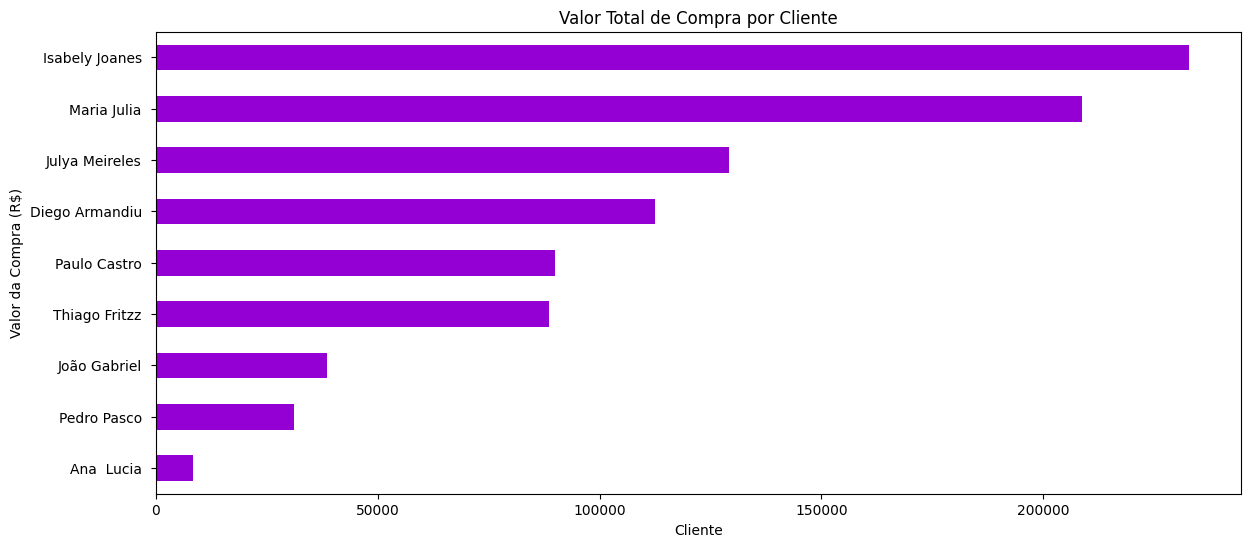

In [29]:
plt.figure(figsize=(14,6))
df_plt.plot(kind='barh', color='darkviolet')

plt.title('Valor Total de Compra por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Valor da Compra (R$)')

# Mais um exercicio para manter a conteudo ativo na memoria

In [30]:
url_condominio = 'https://cdn3.gnarususercontent.com.br/2928-transformacao-manipulacao-dados/dados_locacao_imoveis.json'

response = requests.get(url_condominio)

df_condominio = pd.DataFrame(response.json())
df_condominio = pd.json_normalize(df_condominio['dados_locacao'])
df_condominio

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),"[01/06/2022, 01/07/2022]","[05/06/2022, 03/07/2022]","[$ 1000,0 reais, $ 2500,0 reais]"
1,A102 (blocoAP),"[02/06/2022, 02/07/2022]","[02/06/2022, 06/07/2022]","[$ 1100,0 reais, $ 2600,0 reais]"
2,B201 (blocoAP),"[03/06/2022, 03/07/2022]","[07/06/2022, 03/07/2022]","[$ 1200,0 reais, $ 2700,0 reais]"
3,B202 (blocoAP),"[04/06/2022, 04/07/2022]","[07/06/2022, 05/07/2022]","[$ 1300,0 reais, $ 2800,0 reais]"
4,C301 (blocoAP),"[05/06/2022, 05/07/2022]","[10/06/2022, 09/07/2022]","[$ 1400,0 reais, $ 2900,0 reais]"
5,C302 (blocoAP),"[06/06/2022, 06/07/2022]","[08/06/2022, 12/07/2022]","[$ 1500,0 reais, $ 1200,0 reais]"
6,D401 (blocoAP),"[07/06/2022, 07/07/2022]","[07/06/2022, 09/07/2022]","[$ 1600,0 reais, $ 1300,0 reais]"
7,D402 (blocoAP),"[08/06/2022, 08/07/2022]","[10/06/2022, 14/07/2022]","[$ 1700,0 reais, $ 1400,0 reais]"
8,E501 (blocoAP),"[09/06/2022, 09/07/2022]","[10/06/2022, 09/07/2022]","[$ 1800,0 reais, $ 1500,0 reais]"
9,E502 (blocoAP),"[10/06/2022, 10/07/2022]","[16/06/2022, 12/07/2022]","[$ 1900,0 reais, $ 1600,0 reais]"


In [31]:
colunas = list(df_condominio.columns)
colunas

['apartamento',
 'datas_combinadas_pagamento',
 'datas_de_pagamento',
 'valor_aluguel']

In [32]:
df_condominio = df_condominio.explode(colunas[1:])
df_condominio.reset_index(drop=True, inplace=True)
df_condominio

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101 (blocoAP),01/06/2022,05/06/2022,"$ 1000,0 reais"
1,A101 (blocoAP),01/07/2022,03/07/2022,"$ 2500,0 reais"
2,A102 (blocoAP),02/06/2022,02/06/2022,"$ 1100,0 reais"
3,A102 (blocoAP),02/07/2022,06/07/2022,"$ 2600,0 reais"
4,B201 (blocoAP),03/06/2022,07/06/2022,"$ 1200,0 reais"
5,B201 (blocoAP),03/07/2022,03/07/2022,"$ 2700,0 reais"
6,B202 (blocoAP),04/06/2022,07/06/2022,"$ 1300,0 reais"
7,B202 (blocoAP),04/07/2022,05/07/2022,"$ 2800,0 reais"
8,C301 (blocoAP),05/06/2022,10/06/2022,"$ 1400,0 reais"
9,C301 (blocoAP),05/07/2022,09/07/2022,"$ 2900,0 reais"


In [33]:
df_condominio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   apartamento                 30 non-null     object
 1   datas_combinadas_pagamento  30 non-null     object
 2   datas_de_pagamento          30 non-null     object
 3   valor_aluguel               30 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [34]:
df_condominio['valor_aluguel'] = df_condominio['valor_aluguel'].apply(lambda x: x.replace('$', '').replace('reais', '').replace(',', '.')).astype(float)
df_condominio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   apartamento                 30 non-null     object 
 1   datas_combinadas_pagamento  30 non-null     object 
 2   datas_de_pagamento          30 non-null     object 
 3   valor_aluguel               30 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


In [35]:
df_condominio['datas_combinadas_pagamento'] = pd.to_datetime(df_condominio['datas_combinadas_pagamento'], dayfirst=True, errors='coerce')
df_condominio['datas_de_pagamento'] = pd.to_datetime(df_condominio['datas_de_pagamento'], dayfirst=True, errors='coerce')
df_condominio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   apartamento                 30 non-null     object        
 1   datas_combinadas_pagamento  30 non-null     datetime64[ns]
 2   datas_de_pagamento          30 non-null     datetime64[ns]
 3   valor_aluguel               30 non-null     float64       
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 1.1+ KB


In [36]:
# Opção de substituição - necessário verificar o resultado da substituição
# Foi necessário adicionar a barra '\' para ser considerados os parênteses como caracteres literais
df_condominio['apartamento'].str.replace(' \(blocoAP\)', '', regex=True)

# Realizar a substituição dos dados na coluna textual
df_condominio['apartamento'] = df_condominio['apartamento'].str.replace(' \(blocoAP\)', '', regex=True)
# Visualizar o resultado final
df_condominio

,apartamento,datas_combinadas_pagamento,datas_de_pagamento,valor_aluguel
0,A101,2022-06-01,2022-06-05,1000.0
1,A101,2022-07-01,2022-07-03,2500.0
2,A102,2022-06-02,2022-06-02,1100.0
3,A102,2022-07-02,2022-07-06,2600.0
4,B201,2022-06-03,2022-06-07,1200.0
5,B201,2022-07-03,2022-07-03,2700.0
6,B202,2022-06-04,2022-06-07,1300.0
7,B202,2022-07-04,2022-07-05,2800.0
8,C301,2022-06-05,2022-06-10,1400.0
9,C301,2022-07-05,2022-07-09,2900.0


In [37]:

df_plot = df_condominio.groupby('apartamento')['valor_aluguel'].mean().sort_values()
df_plot

,valor_aluguel
apartamento,
C302,1350.0
D401,1450.0
F601,1500.0
D402,1550.0
F602,1600.0
E501,1650.0
G701,1700.0
A101,1750.0
E502,1750.0


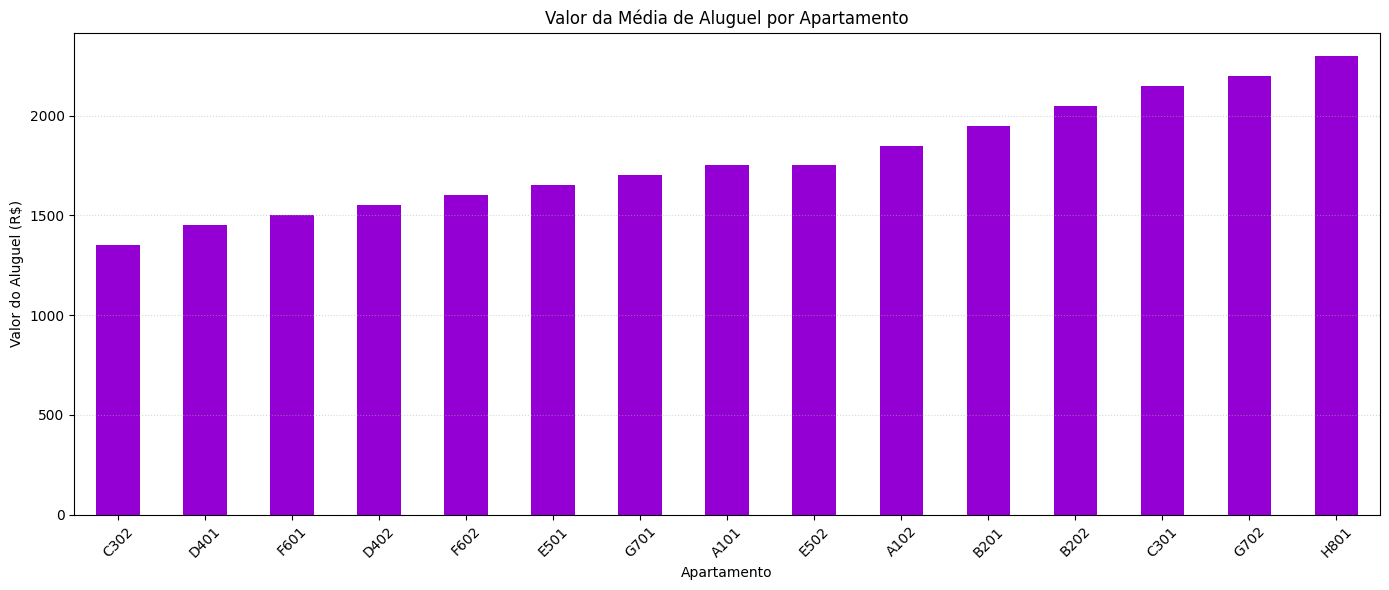

In [38]:
plt.figure(figsize=(14,6))
df_plot.plot(kind='bar', color='darkviolet')

plt.title('Valor da Média de Aluguel por Apartamento')
plt.xlabel('Apartamento')
plt.ylabel('Valor do Aluguel (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

In [40]:
agora = datetime.datetime.now()

print("Data e hora atual:", agora)

Data e hora atual: 2025-04-17 02:04:13.654089


In [41]:
hoje = datetime.date.today()

print("Data de hoje:", hoje)

Data de hoje: 2025-04-17


In [42]:
# criando dois objetos date com datas diferentes
data_1 = datetime.date(2022, 1, 1)
data_2 = datetime.date(2023, 1, 1)

diferenca = data_2 - data_1

print("Diferença entre as duas datas:", diferenca)

Diferença entre as duas datas: 365 days, 0:00:00
